### 📊 ESTUDO DE CASO: DIABETES
👩‍💻 **Autora:** Thaís Cristina dos Santos 

### 🧠 Contexto do Projeto

O diabetes mellitus é uma doença crônica caracterizada pela elevação anormal dos níveis de glicose no sangue, e representa um dos maiores desafios de saúde pública no mundo.  

Identificar precocemente os fatores associados ao desenvolvimento do diabetes pode auxiliar na **prevenção e diagnóstico antecipado**, reduzindo custos e melhorando a qualidade de vida dos pacientes.

Este projeto utiliza o **Pima Indians Diabetes Database**, um conjunto de dados amplamente utilizado em estudos de *Machine Learning* e *Ciência de Dados em Saúde*, que contém informações clínicas e demográficas de pacientes.

### 🎯 Objetivo do Projeto

O objetivo principal deste estudo é **analisar e modelar os fatores de risco associados ao diagnóstico de diabetes** a partir de variáveis clínicas como:

- Glicose, pressão arterial e insulina;  
- Espessura da pele (SkinThickness) e índice de massa corporal (BMI);  
- Idade e número de gestações.

O trabalho está dividido em duas etapas principais:

1. **Análise Exploratória de Dados (EDA):** entender a distribuição das variáveis, detectar padrões e relações com o diagnóstico.  
2. **Modelagem Preditiva:** aplicar algoritmos de classificação (Regressão Logística e Random Forest) para prever a probabilidade de um paciente ser diabético.

O projeto busca não apenas a performance preditiva, mas também a **interpretação dos resultados** — fundamental em aplicações na área da saúde.

### ⚙️ Principais Desafios

Durante o desenvolvimento do projeto, alguns desafios foram identificados:

- **Presença de valores inválidos (zeros)** em variáveis como glicose, insulina e IMC, que exigiram tratamento e imputação de dados.  
- **Desequilíbrio moderado entre classes**, com maior proporção de pacientes não diabéticos, o que pode impactar as métricas de classificação.  
- **Alta variabilidade em algumas variáveis** (especialmente insulina), demandando atenção à detecção de outliers.  
- Necessidade de **padronização (scaling)** para evitar que variáveis com escalas diferentes distorcessem o aprendizado dos modelos.

Esses desafios foram tratados com **técnicas de engenharia de features e modelagem supervisionada**, garantindo resultados consistentes e interpretáveis.



### 🗂️ 1. Carregamento e Inspeção dos Dados
**Entender o dataset**:
   - Número de linhas e colunas.
   - Tipos de dados.
   - Presença de valores ausentes ou inconsistentes.

In [2]:
# Importação de Bibliotecas
import pandas as pd
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregamento e Inspeção Inicial
diabetes_data = Path("data")/"diabetes.csv"
diabetes_data = pd.read_csv(diabetes_data)
display("Arquivo Carregado", diabetes_data)

'Arquivo Carregado'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Informações Básicas
print("\nPrimeiras 5 linhas do dataset:")
print(diabetes_data.head())

print("\nTipos das colunas e contagem por tipo:")
print(diabetes_data.dtypes.value_counts())

print("\nInfo (resumo):")
print(diabetes_data.info())


Primeiras 5 linhas do dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Tipos das colunas e contagem por tipo:
int64      7
float64    2
Name: count, dtype: int64

Info (resumo):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
--- 

### 🧹2. Limpeza e Preparação de Dados
Vamos preparar o dataset para análise:
**Tratar valores ausentes**:
   - Substituir zeros em colunas onde valores nulos biologicamente fazem mais sentido.
   - Preencher valores ausentes com a mediana das respectivas colunas.

In [5]:
# Colunas onde 0 não faz sentido biologicamente
cols_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Substituir zeros por NaN
diabetes_data[cols_to_fix] = diabetes_data[cols_to_fix].replace(0, np.nan)

# Preencher valores NaN pela mediana de cada coluna
for col in cols_to_fix:
    median_value = diabetes_data[col].median()
    diabetes_data[col] = diabetes_data[col].fillna(median_value)

# Conferir se ainda restam valores nulos
print("Valores nulos restantes por coluna:")
print(diabetes_data.isnull().sum())

# Verificar estatísticas após correção
print("\nEstatísticas das colunas corrigidas:")
print(diabetes_data[cols_to_fix].describe())

Valores nulos restantes por coluna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Estatísticas das colunas corrigidas:
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.10

#### 🔍3. Análise Exploratória
**Visualizar a distribuição das variáveis**:
   - Distribuição da variável alvo `Outcome`.
   - Boxplots das principais variáveis em relação a `Outcome` para identificar diferenças entre diabéticos e não diabéticos.

**Gerar estatísticas descritivas**:
   - Médias, medianas, mínimos, máximos e quartis das colunas numéricas.
   - Auxiliar na identificação de outliers e padrões iniciais nos dados.

#### Principais Desafios
- Colunas com valores zero que não fazem sentido biologicamente (ex: `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`).
- Necessidade de preencher valores ausentes de forma apropriada para não enviesar análises e gráficos.
- Exploração visual clara e objetiva, destacando relações com a variável alvo.

> Após esta análise exploratória, os dados estarão prontos para modelagem preditiva ou análises mais avançadas.

In [6]:
# Verificar proporção de diabéticos vs não diabéticos
outcome_counts = diabetes_data["Outcome"].value_counts(normalize=True)

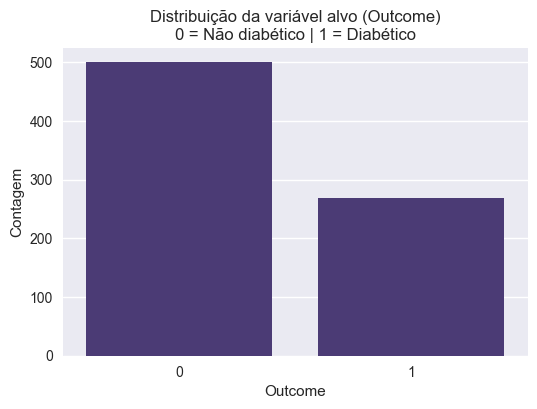

In [18]:
# Configurações de estilo
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# 1. Distribuição da variável alvo (Outcome)
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=diabetes_data, x="Outcome")
ax.set_title("Distribuição da variável alvo (Outcome)\n0 = Não diabético | 1 = Diabético")
ax.set_xlabel("Outcome")
ax.set_ylabel("Contagem")

plt.show()


### 🔹 Proporção de diabéticos vs. não diabéticos

- 65,1% não diabéticos (Outcome = 0)

- 34,9% diabéticos (Outcome = 1)

👉 Existe um certo desbalanceamento de classes, mas ainda aceitável para análise.

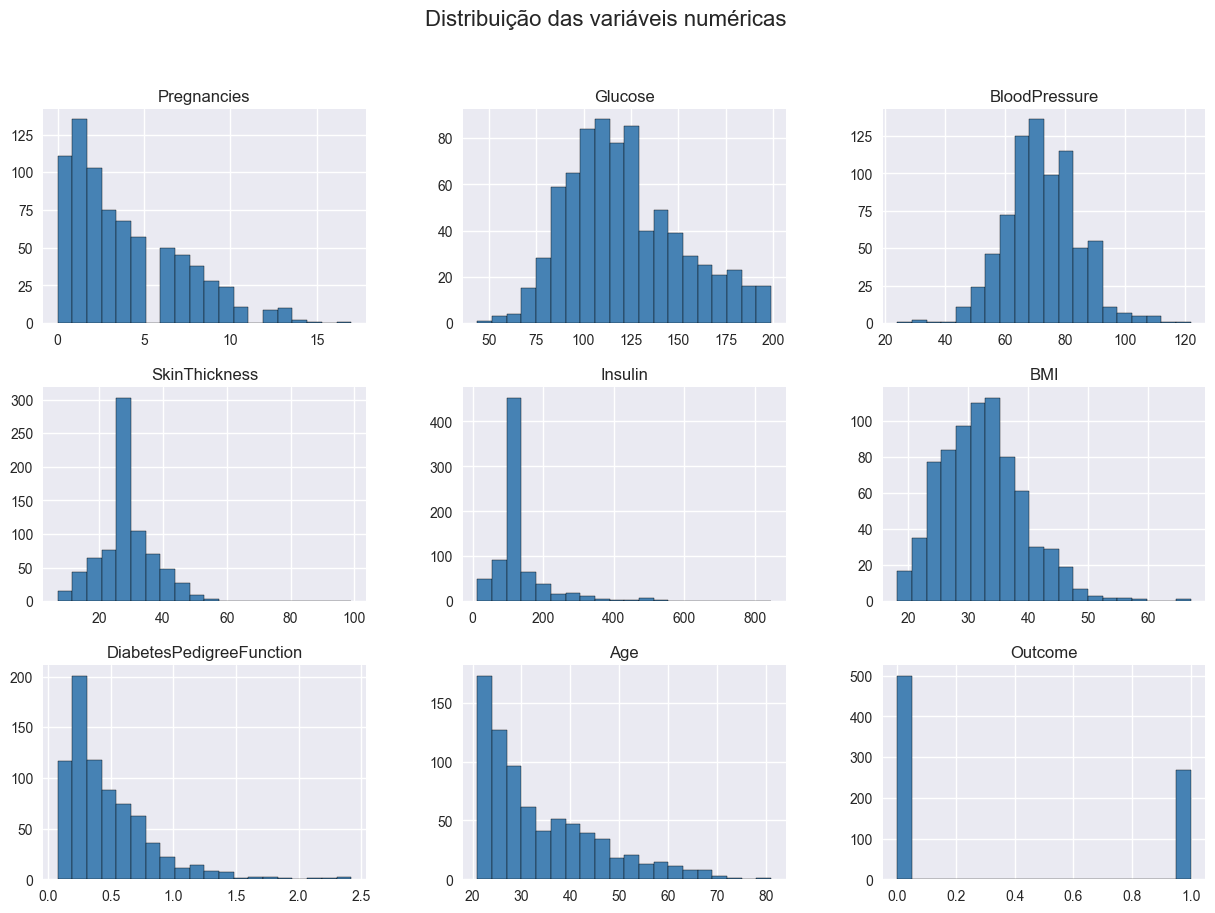

In [20]:
# Configurações de estilo
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# 2. Histogramas das principais variáveis numéricas
diabetes_data.hist(bins=20, figsize=(15,10), color="steelblue", edgecolor="black")
plt.suptitle("Distribuição das variáveis numéricas", fontsize=16)
plt.show()

### 🔹 Distribuição das variáveis

- Glucose → distribuição mais alta em torno de 100–140, mas com cauda longa (pessoas com glicose bem elevada).

- BloodPressure → maioria entre 60–80 mmHg, como esperado.

- BMI → média em torno de 32, indicando sobrepeso/obesidade em grande parte da amostra.

- Insulin → muito concentrada em valores baixos, mas com alguns outliers acima de 500.

- SkinThickness → maioria abaixo de 40 mm, também com outliers.

- Age → concentração entre 20 e 40 anos, mas há casos até 80.

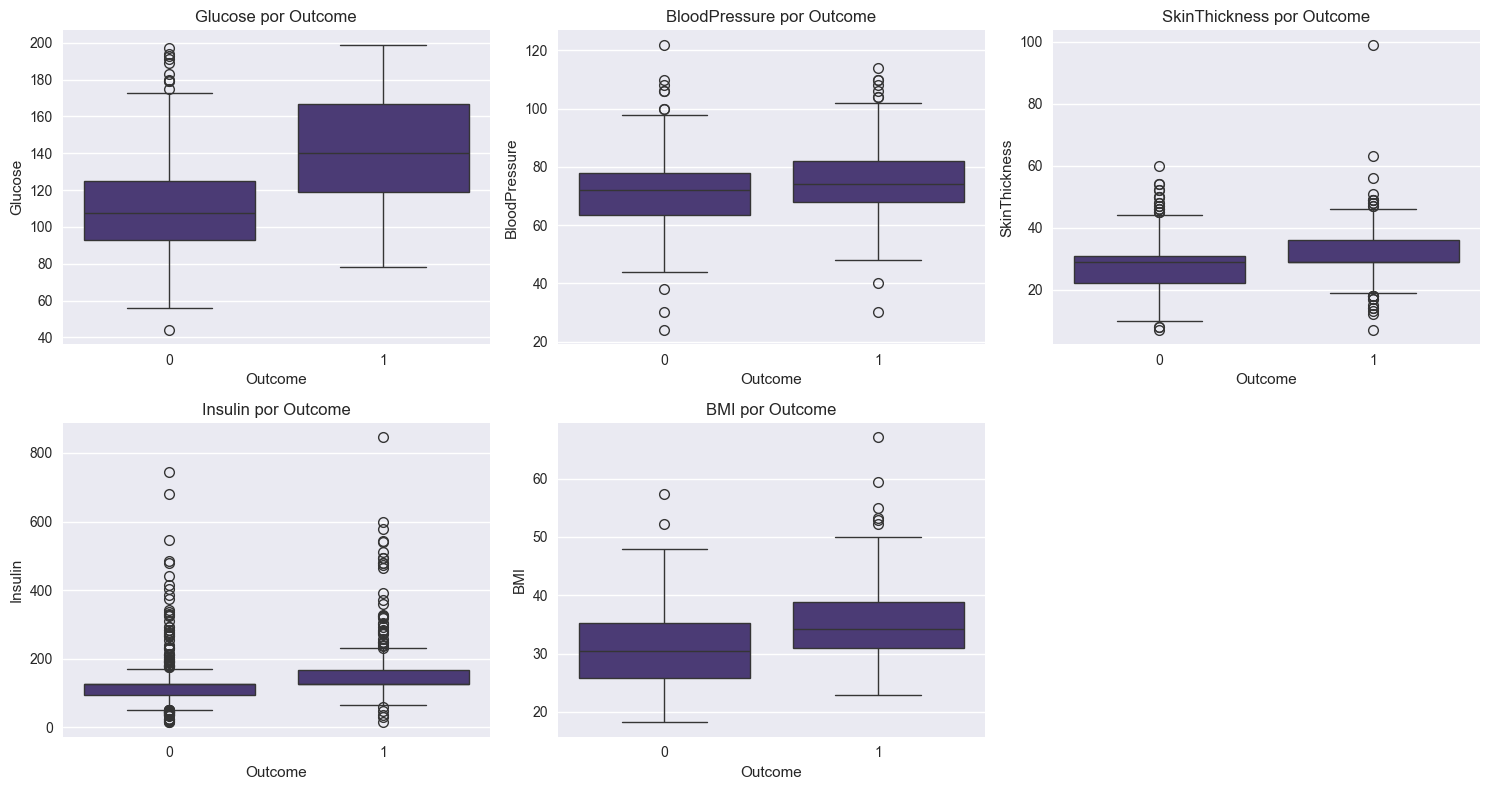

In [ ]:
# Configurações de estilo
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# Tamanho da figura
plt.figure(figsize=(15, 8))

# 3. Criar um boxplot para cada coluna em cols_to_fix comparando com Outcome
for i, col in enumerate(cols_to_fix, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=diabetes_data, x="Outcome", y=col)
    plt.title(f"{col} por Outcome")
    plt.xlabel("Outcome")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### 🔹 Boxplots (comparando Outcome)

Pessoas com diabetes (Outcome = 1) tendem a ter:

- Glucose mais alto

- BMI maior

- Idade mais elevada

- Diferença menos clara em BloodPressure e SkinThickness.

- Insulin mostra grande variação e outliers em ambos os grupos.

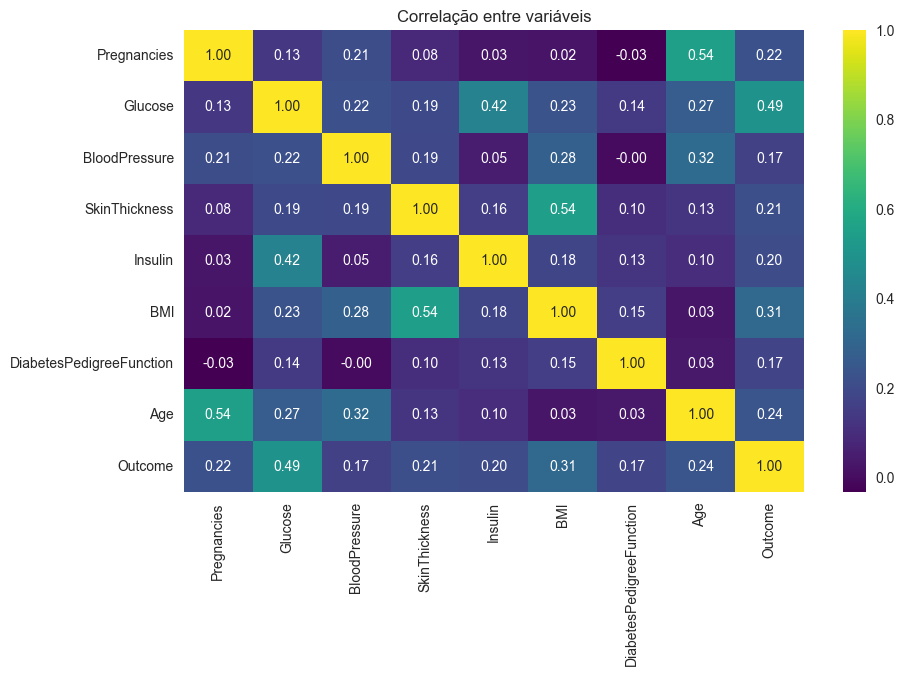

In [21]:
# Configurações de estilo
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# 4. Mapa de correlação
plt.figure(figsize=(10,6))
sns.heatmap(diabetes_data.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlação entre variáveis")
plt.show()

### 🔹 Correlação entre variáveis

- Glucose x Outcome → correlação moderada positiva (~0.47).
 
- BMI x Outcome → também positiva (~0.29).

- Age x Outcome → positiva (~0.24).

- Outras correlações são mais fracas.

### 🧩 Separação entre Features e Variável Alvo

Nesta etapa, vamos separar as variáveis independentes (`X`) da variável alvo (`y`).

- `X`: contém todas as colunas que serão usadas como preditoras.  
- `y`: contém a variável de saída `Outcome`, que indica se o paciente é diabético (`1`) ou não (`0`).

Essa separação é fundamental para que o modelo de Machine Learning aprenda os padrões dos dados.


In [11]:
X = diabetes_data.drop("Outcome", axis=1)
y = diabetes_data["Outcome"]

### 🔀 Divisão em Dados de Treino e Teste

O dataset será dividido em **80% para treino** e **20% para teste**.

- **Treino:** usado para o modelo aprender os padrões.  
- **Teste:** usado para avaliar o desempenho em dados nunca vistos.  

Também aplicamos `stratify=y` para manter a mesma proporção de classes (diabético/não diabético) em ambas as amostras.


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### ⚖️ Escalonamento das Variáveis

Alguns algoritmos de Machine Learning (como Regressão Logística e SVM) são sensíveis à escala dos dados.

Por isso, usamos o **StandardScaler**, que padroniza as variáveis numéricas para média = 0 e desvio padrão = 1.

> Esse passo garante que todas as variáveis contribuam igualmente para o modelo.


In [13]:
# Modelo Linear: Regressão Logística
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 🤖 Modelagem Preditiva (Baseline) — Regressão Logística

Começamos com um modelo simples e interpretável: **Regressão Logística**.

Esse modelo é amplamente utilizado em problemas de classificação binária e nos permite:

- Calcular probabilidades de um paciente ser diabético.  
- Interpretar a importância relativa de cada variável (coeficientes).  
- Criar uma **linha de base (baseline)** para comparar modelos mais complexos depois.


In [14]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)


### 🌲 Modelo Robusto — Random Forest

O segundo modelo é uma **Random Forest**, que combina diversos classificadores de árvore (ensemble).

Vantagens:
- Detecta interações não lineares entre variáveis.  
- É menos sensível a outliers e escalonamento.  
- Permite identificar as **features mais importantes** para o diagnóstico.

Esse modelo geralmente apresenta desempenho superior à Regressão Logística.


In [15]:
# Radom Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


### 📈 Avaliação dos Modelos

Aqui comparamos os resultados dos dois modelos usando as seguintes métricas:

- **Accuracy (Acurácia)** → porcentagem de acertos totais.  
- **Precision (Precisão)** → entre os diagnosticados como diabéticos, quantos realmente são.  
- **Recall (Sensibilidade)** → entre todos os diabéticos, quantos o modelo conseguiu identificar.  
- **F1-Score** → equilíbrio entre precisão e recall.

Além disso, exibimos a **matriz de confusão**, que mostra como o modelo classificou os casos corretamente ou incorretamente.


In [16]:
# Avaliação de Modelos
from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



### 🔎 Importância das Variáveis 

Com o modelo Random Forest, podemos visualizar a contribuição de cada variável no diagnóstico.

Essa etapa ajuda a responder perguntas como:
- Quais fatores mais influenciam no resultado?  
- A glicose é realmente o principal indicador de diabetes?

O gráfico de barras apresenta as variáveis ordenadas por importância.


<Axes: title={'center': 'Importância das variáveis'}>

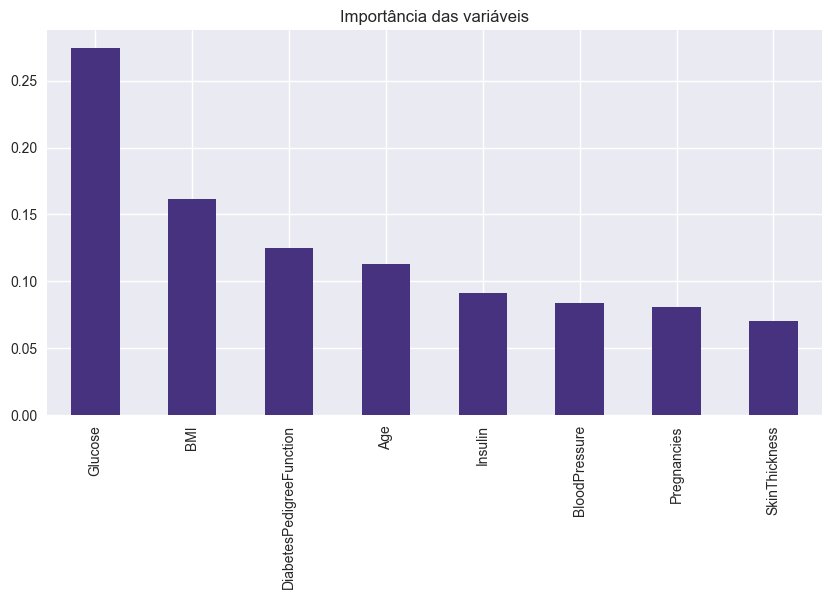

In [22]:
# Configurações de estilo
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# Importância das Variáveis: Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind="bar", figsize=(10,5), title="Importância das variáveis")


### ✅ Conclusão Final

Após aplicar a engenharia de features e os dois modelos (Regressão Logística e Random Forest), observamos que:

- O modelo da **Random Forest apresentou melhor desempenho geral**.  
- As variáveis mais influentes foram: **Glucose**, **BMI** e **Age**.  
- A análise reforça a importância do controle glicêmico e do IMC na prevenção de diabetes.
